https://iexcloud.io/

DataReader offers the data source 'iex'. To experiment with the data outside DataCamp environment, you will need an IEX Cloud account.

In [1]:
# Import DataReader and date
from pandas_datareader.data import DataReader
from datetime import date
import os
# Set start and end dates
start = date(2016, 1, 1)
end = date(2016, 12, 31)
# Set the ticker and data source
ticker = 'AAPL'
data_source = 'iex'

# # Import the stock prices
stock_prices = DataReader(ticker, data_source, start, end)

# Display and inspect the result
print(stock_prices.head())
stock_prices.info() 

               open     high      low    close       volume
date                                                       
2016-01-04  25.6525  26.3420  25.5000  26.3375  270597548.0
2016-01-05  26.4375  26.4625  25.6025  25.6775  223163968.0
2016-01-06  25.1400  25.5925  24.9675  25.1750  273829552.0
2016-01-07  24.6700  25.0325  24.1075  24.1125  324377712.0
2016-01-08  24.6375  24.7775  24.1900  24.2400  283192064.0
<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    252 non-null    float64
 1   high    252 non-null    float64
 2   low     252 non-null    float64
 3   close   252 non-null    float64
 4   volume  252 non-null    float64
dtypes: float64(5)
memory usage: 11.8+ KB


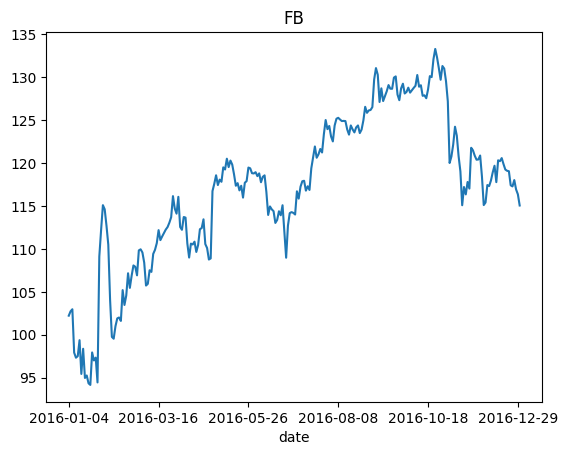

In [2]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set start and end dates
start = date(2016, 1, 1)
end = date(2016, 12, 31)

# Set the ticker and data_source
ticker = 'FB'
data_source = 'iex'

# Import the data using DataReader
stock_prices = DataReader(ticker, data_source, start, end)

# Plot close
stock_prices['close'].plot(title=ticker)

# Show the plot
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 670 entries, 1968-01-01 to 2023-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WTISPLC  670 non-null    float64
dtypes: float64(1)
memory usage: 10.5 KB


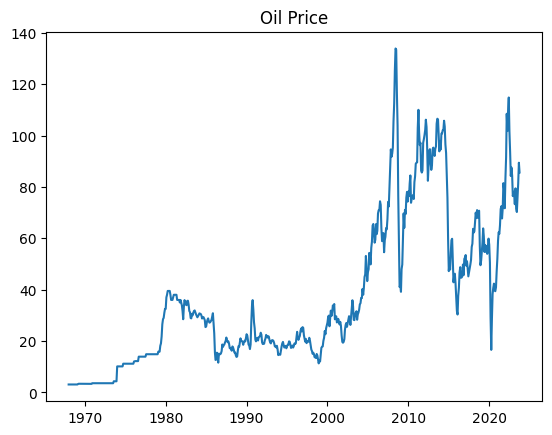

In [3]:
# Set start date
start = date(1968, 1, 1)

# Set series code
series = 'WTISPLC'

# Import the data
oil_price = DataReader(series, 'fred', start=start)

# Inspect the price of oil
oil_price.info()

# Plot the price of oil
plt.plot(oil_price)
plt.title('Oil Price')

# Show the plot
plt.show()

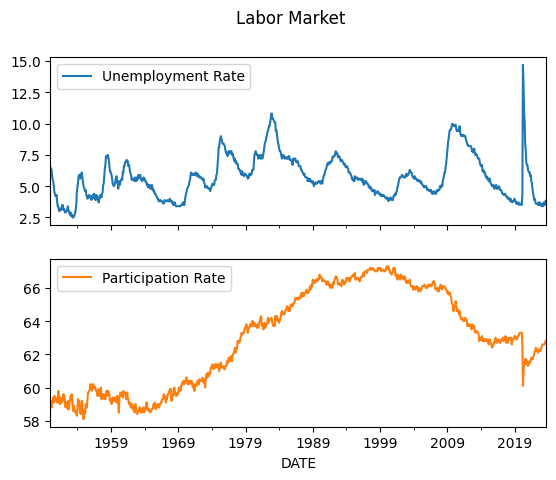

In [4]:
# Set the start date
start = date(1950, 1, 1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market')

# Show the plot
plt.show()

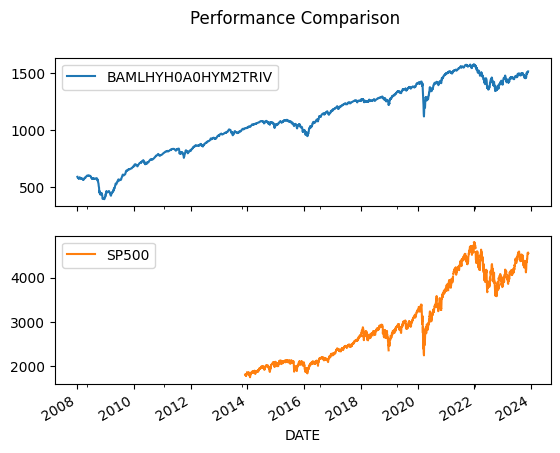

In [5]:
# Set the start date
start = date(2008, 1, 1)

# Set the series codes
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(subplots=True, title='Performance Comparison')

# Show the plot
plt.show()

In [11]:
import pandas as pd

# Create the pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listings = pd.concat(listings)

# Inspect the results
listings.info()

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<class 'pandas.core.frame.DataFrame'>
Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [13]:
# Select companies in Consumer Services
consumer_services = listings[listings.Sector == 'Consumer Services']

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values('Market Capitalization', ascending=False)

# Display first 5 rows of designated columns
(consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head())

,Company Name,Exchange,Market Capitalization
4,"Amazon.com, Inc.",nasdaq,4.221385e+11
3013,"Wal-Mart Stores, Inc.",nyse,2.218646e+11
3014,Walt Disney Company (The),nyse,1.789973e+11
6,Comcast Corporation,nasdaq,1.764745e+11
1438,"Home Depot, Inc. (The)",nyse,1.752626e+11


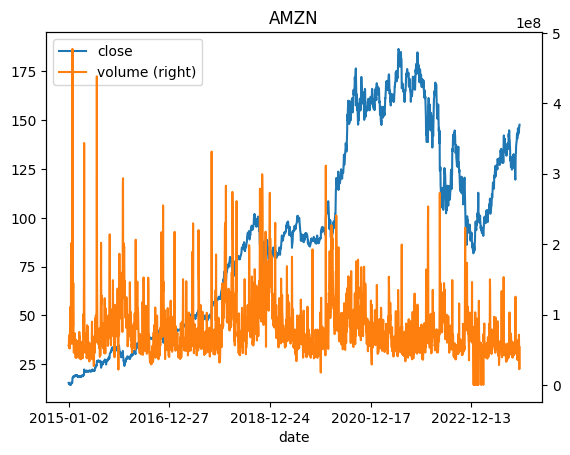

In [18]:
# Set the index of listings to Stock Symbol
listings_ss = listings.set_index('Stock Symbol')

# Get ticker of the largest Consumer Services company
ticker = listings_ss.loc[listings_ss.Sector == 'Consumer Services', 'Market Capitalization'].idxmax()

# Set the start date
start = date(2015, 1, 1)

# Import the stock data
data = DataReader(ticker,data_source, start)

# Plot close and volume
data[['close', 'volume']].plot(secondary_y='volume', title=ticker)

# Show the plot
plt.show()

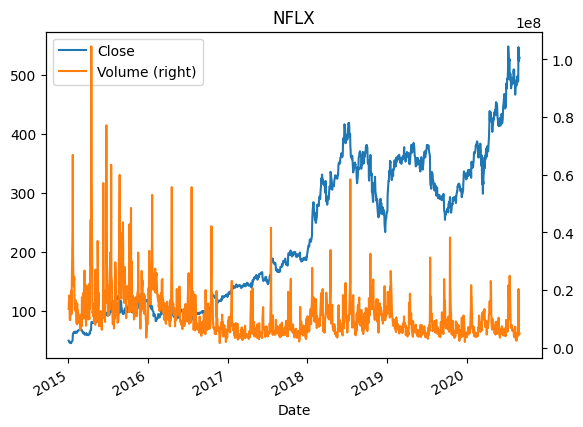

In [19]:
# Set Stock Symbol as the index
listings = listings.set_index('Stock Symbol')

# Get ticker of the largest consumer services company listed after 1997
ticker = listings.loc[(listings['Sector'] == 'Consumer Services') & (listings['IPO Year'] > 1998), 'Market Capitalization'].idxmax()

# Set the start date
start = '2015-01-01'

# Import the stock data
data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/{}?period1=1420070400&period2=1598918400&interval=1d&events=history'.format(ticker), index_col='Date', parse_dates=True)

# Plot close and volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker)

# Show the plot
plt.show()

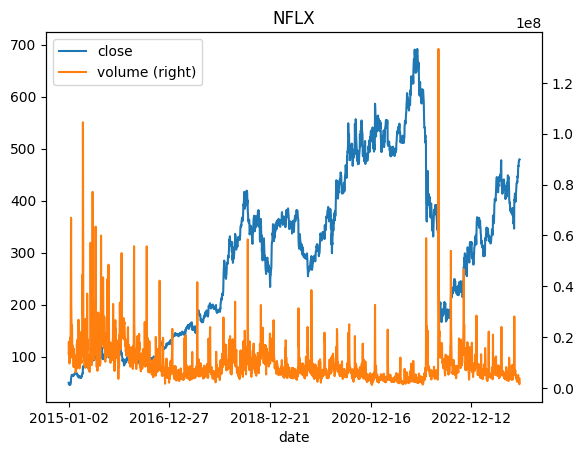

In [22]:
# Set Stock Symbol as the index
# listings = listings.set_index('Stock Symbol')

# Get ticker of the largest consumer services company listed after 1997
ticker = listings.loc[(listings.Sector == 'Consumer Services') & (listings['IPO Year'] > 1998), 'Market Capitalization'].idxmax()

# Set the start date
start = date(2015, 1, 1)

# Import the stock data
data = DataReader(ticker, data_source, start)

# Plot close and volume
data[['close', 'volume']].plot(secondary_y='volume', title=ticker)

# Show the plot
plt.show()

In [25]:
# Set Stock Symbol as the index
listings_ss = listings

# Get ticker of 3 largest finance companies
top_3_companies = listings_ss.loc[listings_ss.Sector == 'Finance', 'Market Capitalization'].nlargest(n=3)

# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

# Set start date
start = date(2015, 1, 1)

# Set end date
end = date(2020, 4, 1)

# Import stock data
result = DataReader(top_3_tickers, 'iex', start, end)

# Apply stack method 
data = result.stack()

# Unstack and inspect result
data['close'].unstack().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 2015-01-02 to 2020-04-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JPM     1321 non-null   float64
 1   WFC     1321 non-null   float64
 2   BAC     1321 non-null   float64
dtypes: float64(3)
memory usage: 41.3+ KB


In [26]:
data

Attributes             open   high      low  close    volume
date       Symbols                                          
2015-01-02 JPM      62.6200  62.96  62.0700  62.49  12599991
           WFC      55.1100  55.19  54.1935  54.70  11700856
           BAC      17.9900  18.03  17.6801  17.90  48951133
2015-01-05 JPM      62.0600  62.28  60.2300  60.55  20100577
           WFC      54.1400  54.36  53.1000  53.20  15000528
...                     ...    ...      ...    ...       ...
2020-03-31 WFC      29.4100  29.75  28.1600  28.70  36920282
           BAC      21.8200  22.49  20.9600  21.23  95213702
2020-04-01 JPM      85.1000  86.56  83.2500  84.36  28029566
           WFC      27.0197  27.37  26.2000  26.57  48497405
           BAC      19.9300  20.35  19.5100  19.77  83961299

[3963 rows x 5 columns]